In this project We are trying to build a machine learning model that can learn from past loans in trying to predict which loans will be paid off and which won’t.

In [1]:
import os
os.getcwd()

'C:\\Users\\Bishal'

In [2]:
os.chdir("F:\\Data Science Course\\Assignment\\Logistics Regression\\Lending Club loan data")

In [3]:
# importing all liabraraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
plt.rcParams['figure.figsize'] = (12,8)

# Importing Data

In [4]:
# skipping 1st rows while reading file as 1st rows is only text, no us to model
loan_2007= pd.read_csv("lending_club_loans_raw.csv", skiprows =1, low_memory = False)
loan_2007.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,NaN,Sep-2016,744.0,740.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2016,499.0,0.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Na

In [5]:
loan_2007.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'po

In [6]:
loan_2007.shape

(42538, 115)

In [7]:
# dropping the irrelevant colomns
loan_2007_new = loan_2007.drop(["id","member_id","url","desc"], axis =1)

In [8]:
loan_2007_new.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [9]:
loan_2007_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,NaN,Sep-2016,744.0,740.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2016,499.0,0.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,NaN,Sep-2016,719.0,715.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,NaN,Apr-2016,604.0,600.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical 

In [10]:
loan_2007_new.shape

(42538, 111)

# Data Preprocessing

Data Exploration and Variable Reduction

In [11]:
loan_2007_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 111 entries, loan_amnt to total_il_high_credit_limit
dtypes: float64(89), object(22)
memory usage: 36.0+ MB


In [12]:
loan_2007_new.isnull().sum()

loan_amnt                             3
funded_amnt                           3
funded_amnt_inv                       3
term                                  3
int_rate                              3
installment                           3
grade                                 3
sub_grade                             3
emp_title                          2629
emp_length                         1115
home_ownership                        3
annual_inc                            7
verification_status                   3
issue_d                               3
loan_status                           3
pymnt_plan                            3
purpose                               3
title                                16
zip_code                              3
addr_state                            3
dti                                   3
delinq_2yrs                          32
earliest_cr_line                     32
fico_range_low                        3
fico_range_high                       3


In [13]:
loan_2007_new.isnull().values.sum()

2408196

In [14]:
# defining the criteria for dropping colomns
half_count = len(loan_2007_new) / 2

In [15]:
# we can delete missing value colomns which is more than 50% of the overall data
loan_2007_new = loan_2007_new.dropna(thresh=half_count,axis=1)

In [16]:
loan_2007_new.shape

(42538, 54)

In [17]:
loan_2007_new.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,Sep-2016,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,Apr-2016,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,other,Personal,972xx,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,15.0,0.0,27783.0,53.9%,38.0,f,270.78,270.78,3784.490000,3784.49,2729.22,1055.27,0.00,0.00,0.00,Sep-2016,67.79,Sep-2016,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [18]:
# check the data disctionary, import it and underastsnd the varaiables
data_dictionary = pd.read_csv('LCDataDictionary.csv')
print(data_dictionary.shape[0])
print(data_dictionary.columns.tolist())

118
['Name', 'Description']


In [19]:
data_dictionary.head(10)

,Name,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


# Dropping unnecessary colomns after analyzing variables

Leak information from future: A column is considered to leak information when the data it contains won’t be available when we use our model to make predictions. According to that the followng colomns are dropped from the dataset. In this case we are using our model on future loan applications to predict whether a borrower will default

In [20]:
# dropping unnecessary colomns based on meaning of variable
drop_list = ['funded_amnt','funded_amnt_inv','int_rate','sub_grade','emp_title','issue_d','zip_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
'last_pymnt_amnt','last_pymnt_d',"title","addr_state","policy_code"]
loan_2007_updated = loan_2007_new.drop(drop_list,axis=1)

In [21]:
loan_2007_updated.shape

(42538, 36)

In [22]:
loan_2007_updated.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,n,credit_card,27.65,0.0,Jan-1985,735.0,739.0,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,0.00,Sep-2016,744.0,740.0,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,car,1.00,0.0,Apr-1999,740.0,744.0,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,117.08,1.11,Sep-2016,499.0,0.0,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,small_business,8.72,0.0,Nov-2001,735.0,739.0,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,0.00,Sep-2016,719.0,715.0,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,other,20.00,0.0,Feb-1996,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,f,16.97,0.00,0.00,Apr-2016,604.0,600.0,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,3000.0,60 months,67.79,B,1 year,RENT,80000.0,Source Verified,Current,n,other,17.94,0.0,Jan-1996,695.0,699.0,0.0,15.0,0.0,27783.0,53.9%,38.0,f,0.00,0.00,0.00,Sep-2016,694.0,690.0,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


# Investigating FICO Score colomns which is very important to the model

In [23]:
print(loan_2007_updated["fico_range_low"].unique())
print(loan_2007_updated["fico_range_high"].unique())

[735. 740. 690. 695. 730. 660. 675. 725. 710. 705. 720. 665. 670. 760.
 685. 755. 680. 700. 790. 750. 715. 765. 745. 770. 780. 775. 795. 810.
 800. 815. 785. 805. 825. 820. 630. 625.  nan 650. 655. 645. 640. 635.
 610. 620. 615.]
[739. 744. 694. 699. 734. 664. 679. 729. 714. 709. 724. 669. 674. 764.
 689. 759. 684. 704. 794. 754. 719. 769. 749. 774. 784. 779. 799. 814.
 804. 819. 789. 809. 829. 824. 634. 629.  nan 654. 659. 649. 644. 639.
 614. 624. 619.]


42538
42535


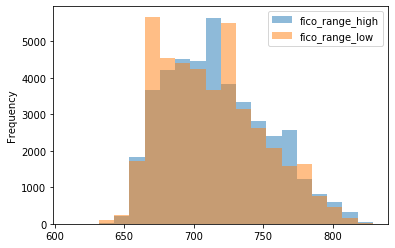

In [24]:
# plotting a histogram of fico colomn
fico_columns = ['fico_range_high','fico_range_low']
print(loan_2007_updated.shape[0])
loan_2007_updated.dropna(subset=fico_columns,inplace=True)
print(loan_2007_updated.shape[0])
loan_2007_updated[fico_columns].plot.hist(alpha=0.5,bins=20);

In [25]:
# lets check the average of Fico score high and low by creating a separte colomns for Fico_average
loan_2007_updated['fico_average'] = (loan_2007_updated['fico_range_high'] + loan_2007_updated['fico_range_low']) / 2

In [26]:
cols = ['fico_range_low','fico_range_high','fico_average']
loan_2007_updated[cols].head()

,fico_range_low,fico_range_high,fico_average
0,735.0,739.0,737.0
1,740.0,744.0,742.0
2,735.0,739.0,737.0
3,690.0,694.0,692.0
4,695.0,699.0,697.0


In [27]:
# now since we got average of Fico colomns, we can drop all other fico colomns
# we cannot use last_fico_range_low, and last_fico_range_high, as LendingClub may have updated these after the borrower’s applications
drop_cols = ['fico_range_low','fico_range_high','last_fico_range_low', 'last_fico_range_high']
loan_2007_updated = loan_2007_updated.drop(drop_cols, axis=1)
loan_2007_updated.shape

(42535, 33)

In [28]:
drop_list = ['funded_amnt','funded_amnt_inv','int_rate','sub_grade','emp_title','issue_d','zip_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
'last_pymnt_amnt','fico_range_low','fico_range_high','last_fico_range_low', 'last_fico_range_high',"pub_rec","pub_rec_bankruptcies","open_acc","last_pymnt_d"]
print(drop_list)

['funded_amnt', 'funded_amnt_inv', 'int_rate', 'sub_grade', 'emp_title', 'issue_d', 'zip_code', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'fico_range_low', 'fico_range_high', 'last_fico_range_low', 'last_fico_range_high', 'pub_rec', 'pub_rec_bankruptcies', 'open_acc', 'last_pymnt_d']


In [29]:
#now checking the details of target colomn (loan_status)
loan_2007_updated["loan_status"].value_counts()


Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [30]:
# I have put the dictinary meaning of the loan status colomns in the notebook for my future refrence.
meaning = [
"Loan has been fully paid off.",
"Loan for which there is no longer a reasonable expectation of further payments.",
"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"Loan is up to date on current payments.",
"The loan is past due but still in the grace period of 15 days.",
"Loan hasn't been paid in 31 to 120 days (late on the current payment).",
"Loan hasn't been paid in 16 to 30 days (late on the current payment).",
"Loan is defaulted on and no payment has been made for more than 121 days."]
status, count = loan_2007_updated["loan_status"].value_counts().index, loan_2007_updated["loan_status"].value_counts().values
loan_statuse_explanation = pd.DataFrame({'Loan Status': status,'Count': count,'Meaning': meaning})[['Loan Status','Count','Meaning']]
loan_statuse_explanation

,Loan Status,Count,Meaning
0,Fully Paid,33586,Loan has been fully paid off.
1,Charged Off,5653,Loan for which there is no longer a reasonable expectation of further payments.
2,Does not meet the credit policy. Status:Fully Paid,1988,"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
3,Does not meet the credit policy. Status:Charged Off,761,"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
4,Current,513,Loan is up to date on current payments.
5,In Grace Period,16,The loan is past due but still in the grace period of 15 days.
6,Late (31-120 days),12,Loan hasn't been paid in 31 to 120 days (late on the current payment).
7,Late (16-30 days),5,Loan hasn't been paid in 16 to 30 days (late on the current payment).
8,Default,1,Loan is defaulted on and no payment has been made for more than 121 days.


From the above table, only the Fully Paid and Charged Off values describe the final outcome of a loan. The other values describe loans that are still ongoing, and even though some loans are late on payments, we can’t classify them as Charged Off. We’re not interested in any statuses that indicate that the loan is ongoing or in progress, because predicting that willbe of no use. Also we should not use Default as it has a small chance to payback.

In [31]:
# Trasforming loan status to only two - Fully Paid and Charged Off
loan_2007_updated = loan_2007_updated[(loan_2007_updated["loan_status"] == "Fully Paid") |
(loan_2007_updated["loan_status"] == "Charged Off")]
mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
loan_2007_updated = loan_2007_updated.replace(mapping_dictionary)

In [32]:
loan_2007_updated.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,0.00,Sep-2016,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,0.00,117.08,1.11,Sep-2016,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,0.00,Sep-2016,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,f,16.97,0.00,0.00,Apr-2016,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,692.0
5,5000.0,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,1,n,wedding,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3%,12.0,f,0.00,0.00,0.00,Jan-2016,0.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,732.0


In [33]:
loan_2007_updated.shape

(39239, 33)

# Data Visualizaton

C:\Users\Bishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  This is separate from the ipykernel package so we can avoid doing imports until


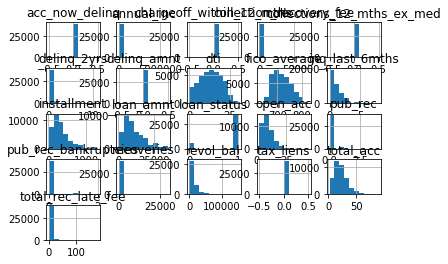

In [34]:
# plotting Histigram
loan_2007_updated.hist()
plt.tight_layout()
plt.show()

In [35]:
loan_2007_updated["loan_status"].value_counts()

1    33586
0     5653
Name: loan_status, dtype: int64

In [36]:
pip install imblearn 

Note: you may need to restart the kernel to use updated packages.


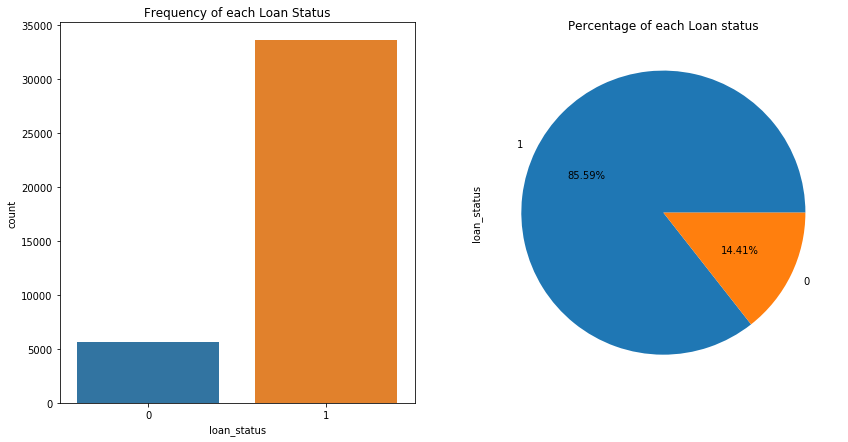

In [37]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=loan_2007_updated,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loan_2007_updated.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

From the above diagrams, we can infer that 85.59% of loan borrowers paid off amount borrowed, while 14.41% unfortunately defaulted.

In [38]:
# removing colomns with one unique value
loan_2007_updated = loan_2007_updated.loc[:,loan_2007_updated.apply(pd.Series.nunique) != 1]

In [39]:
for col in loan_2007_updated.columns:
    if (len(loan_2007_updated[col].unique()) < 4):
        print(loan_2007_updated[col].value_counts())      


 36 months    29096
 60 months    10143
Name: term, dtype: int64
Not Verified       16845
Verified           12526
Source Verified     9868
Name: verification_status, dtype: int64
1    33586
0     5653
Name: loan_status, dtype: int64
n    39238
y        1
Name: pymnt_plan, dtype: int64


In [40]:
# checking no. of rows and colomns 
loan_2007_updated.shape

(39239, 26)

In [41]:
# drop playment colomn as this has only 1 y
loan_2007_updated = loan_2007_updated.drop('pymnt_plan',axis=1)

In [42]:
loan_2007_updated.shape

(39239, 25)

In [43]:
print("We've been able to reduce the features to => {}".format(loan_2007_updated.shape[1]))

We've been able to reduce the features to => 25


In [44]:
loan_2007_updated.to_csv("lending_club_loans_final.csv",index=False)

# More data exploration with the lending_club_final data

In [45]:
Final_data= pd.read_csv("lending_club_loans_final.csv")
Final_data.head()

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,credit_card,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,0.00,0.00,0.00,Sep-2016,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,car,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,0.00,117.08,1.11,Sep-2016,0.0,742.0
2,2400.0,36 months,84.33,C,10+ years,RENT,12252.0,Not Verified,1,small_business,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5%,10.0,0.00,0.00,0.00,Sep-2016,0.0,737.0
3,10000.0,36 months,339.31,C,10+ years,RENT,49200.0,Source Verified,1,other,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21%,37.0,16.97,0.00,0.00,Apr-2016,0.0,692.0
4,5000.0,36 months,156.46,A,3 years,RENT,36000.0,Source Verified,1,wedding,11.20,0.0,Nov-2004,3.0,9.0,0.0,7963.0,28.3%,12.0,0.00,0.00,0.00,Jan-2016,0.0,732.0


In [46]:
Final_data.shape

(39239, 25)

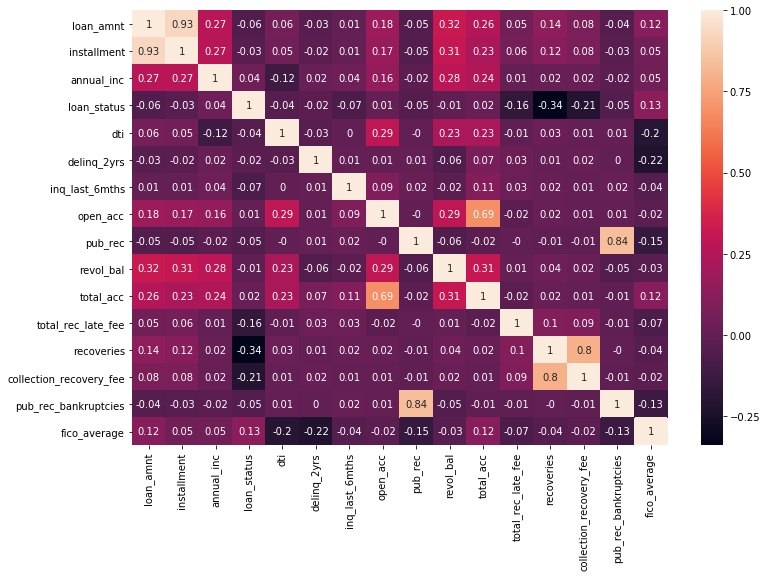

In [47]:
# Checking correlation among independent variables and with target variable
correlation_matrix = Final_data.corr().round(2)
f, ax = plt.subplots(figsize =(12, 8)) 
sns.heatmap(data=correlation_matrix, annot=True)

From the above correlation matrix, it can be inferred that the below independent variables have high correlations

1. loan_amt and installment- 0.93
2. Total_acc and open_acc - 0.68
3. pub_rec and pub_rec_bankcruptcies - 0.84
4. pub_rec_bankcruptcies and pub_rec - 0.84

So as per business knowledge we can remove pub_rec, installment ad Total_acc

In [48]:
Final_data = Final_data.drop(["pub_rec","installment","total_acc"], axis =1)
Final_data.head()

,loan_amnt,term,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies,fico_average
0,5000.0,36 months,B,10+ years,RENT,24000.0,Verified,1,credit_card,27.65,0.0,Jan-1985,1.0,3.0,13648.0,83.7%,0.00,0.00,0.00,Sep-2016,0.0,737.0
1,2500.0,60 months,C,< 1 year,RENT,30000.0,Source Verified,0,car,1.00,0.0,Apr-1999,5.0,3.0,1687.0,9.4%,0.00,117.08,1.11,Sep-2016,0.0,742.0
2,2400.0,36 months,C,10+ years,RENT,12252.0,Not Verified,1,small_business,8.72,0.0,Nov-2001,2.0,2.0,2956.0,98.5%,0.00,0.00,0.00,Sep-2016,0.0,737.0
3,10000.0,36 months,C,10+ years,RENT,49200.0,Source Verified,1,other,20.00,0.0,Feb-1996,1.0,10.0,5598.0,21%,16.97,0.00,0.00,Apr-2016,0.0,692.0
4,5000.0,36 months,A,3 years,RENT,36000.0,Source Verified,1,wedding,11.20,0.0,Nov-2004,3.0,9.0,7963.0,28.3%,0.00,0.00,0.00,Jan-2016,0.0,732.0


In [49]:
Final_data.shape

(39239, 22)

In [50]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39239 entries, 0 to 39238
Data columns (total 22 columns):
loan_amnt                  39239 non-null float64
term                       39239 non-null object
grade                      39239 non-null object
emp_length                 38182 non-null object
home_ownership             39239 non-null object
annual_inc                 39239 non-null float64
verification_status        39239 non-null object
loan_status                39239 non-null int64
purpose                    39239 non-null object
dti                        39239 non-null float64
delinq_2yrs                39239 non-null float64
earliest_cr_line           39239 non-null object
inq_last_6mths             39239 non-null float64
open_acc                   39239 non-null float64
revol_bal                  39239 non-null float64
revol_util                 39189 non-null object
total_rec_late_fee         39239 non-null float64
recoveries                 39239 non-null float64
c

In [51]:
Final_data.isnull().sum()

loan_amnt                     0
term                          0
grade                         0
emp_length                 1057
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
revol_bal                     0
revol_util                   50
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_credit_pull_d            2
pub_rec_bankruptcies        697
fico_average                  0
dtype: int64

Now after treating missing value, we need to convert categorical varibale to numeric variable

In [52]:
# check the detial of object colomns (12)
object_details = Final_data.select_dtypes(include=['object'])
object_details.head()

,term,grade,emp_length,home_ownership,verification_status,purpose,earliest_cr_line,revol_util,last_credit_pull_d
0,36 months,B,10+ years,RENT,Verified,credit_card,Jan-1985,83.7%,Sep-2016
1,60 months,C,< 1 year,RENT,Source Verified,car,Apr-1999,9.4%,Sep-2016
2,36 months,C,10+ years,RENT,Not Verified,small_business,Nov-2001,98.5%,Sep-2016
3,36 months,C,10+ years,RENT,Source Verified,other,Feb-1996,21%,Apr-2016
4,36 months,A,3 years,RENT,Source Verified,wedding,Nov-2004,28.3%,Jan-2016


In [53]:
# we can convert revol_util colomn to numeric by removeing % symbol
Final_data['revol_util'] = Final_data['revol_util'].str.rstrip("%").astype("float")

In [54]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39239 entries, 0 to 39238
Data columns (total 22 columns):
loan_amnt                  39239 non-null float64
term                       39239 non-null object
grade                      39239 non-null object
emp_length                 38182 non-null object
home_ownership             39239 non-null object
annual_inc                 39239 non-null float64
verification_status        39239 non-null object
loan_status                39239 non-null int64
purpose                    39239 non-null object
dti                        39239 non-null float64
delinq_2yrs                39239 non-null float64
earliest_cr_line           39239 non-null object
inq_last_6mths             39239 non-null float64
open_acc                   39239 non-null float64
revol_bal                  39239 non-null float64
revol_util                 39189 non-null float64
total_rec_late_fee         39239 non-null float64
recoveries                 39239 non-null float64


In [55]:
Final_data.shape

(39239, 22)

In [56]:
object_details = Final_data.select_dtypes(include=['object'])
object_details.head()

,term,grade,emp_length,home_ownership,verification_status,purpose,earliest_cr_line,last_credit_pull_d
0,36 months,B,10+ years,RENT,Verified,credit_card,Jan-1985,Sep-2016
1,60 months,C,< 1 year,RENT,Source Verified,car,Apr-1999,Sep-2016
2,36 months,C,10+ years,RENT,Not Verified,small_business,Nov-2001,Sep-2016
3,36 months,C,10+ years,RENT,Source Verified,other,Feb-1996,Apr-2016
4,36 months,A,3 years,RENT,Source Verified,wedding,Nov-2004,Jan-2016


we have Ordinal and Nominal categorical variable
Ordinal- grade and emp_length
Nominal- verification_status,purpose,term

# Creating Dictionary to replace ordinal value to integers

In [57]:
mapping_dict = { "emp_length": { "10+ years": 10, "9 years": 9,"8 years": 8,"7 years": 7,"6 years": 6,"5 years": 5,"4 years": 4,
"3 years": 3,"2 years": 2,"1 year": 1,"< 1 year": 0,"n/a": 0},"grade":{"A": 1,"B": 2,"C": 3,"D": 4,"E": 5,"F": 6,"G": 7}}

In [58]:
Final_data = Final_data.replace(mapping_dict)
Final_data[['emp_length','grade']].head(10)

,emp_length,grade
0,10,2
1,0,3
2,10,3
3,10,3
4,3,1
5,8,3
6,9,5
7,4,6
8,0,2
9,5,3


# Creating dummy variables for Nominal variable

In [59]:
Final_data= pd.get_dummies(Final_data,columns= ['term','home_ownership','verification_status','purpose'], drop_first = True)
Final_data.head()

,loan_amnt,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies,fico_average,term_ 60 months,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,2,10,24000.0,1,27.65,0.0,Jan-1985,1.0,3.0,13648.0,83.7,0.00,0.00,0.00,Sep-2016,0.0,737.0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,3,0,30000.0,0,1.00,0.0,Apr-1999,5.0,3.0,1687.0,9.4,0.00,117.08,1.11,Sep-2016,0.0,742.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,3,10,12252.0,1,8.72,0.0,Nov-2001,2.0,2.0,2956.0,98.5,0.00,0.00,0.00,Sep-2016,0.0,737.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,3,10,49200.0,1,20.00,0.0,Feb-1996,1.0,10.0,5598.0,21.0,16.97,0.00,0.00,Apr-2016,0.0,692.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5000.0,1,3,36000.0,1,11.20,0.0,Nov-2004,3.0,9.0,7963.0,28.3,0.00,0.00,0.00,Jan-2016,0.0,732.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [60]:
Final_data = Final_data.drop(["earliest_cr_line","last_credit_pull_d"], axis =1)
Final_data.head()

,loan_amnt,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies,fico_average,term_ 60 months,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,2,10,24000.0,1,27.65,0.0,1.0,3.0,13648.0,83.7,0.00,0.00,0.00,0.0,737.0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,3,0,30000.0,0,1.00,0.0,5.0,3.0,1687.0,9.4,0.00,117.08,1.11,0.0,742.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,3,10,12252.0,1,8.72,0.0,2.0,2.0,2956.0,98.5,0.00,0.00,0.00,0.0,737.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,3,10,49200.0,1,20.00,0.0,1.0,10.0,5598.0,21.0,16.97,0.00,0.00,0.0,692.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5000.0,1,3,36000.0,1,11.20,0.0,3.0,9.0,7963.0,28.3,0.00,0.00,0.00,0.0,732.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [61]:
Final_data.shape

(39239, 36)

In [62]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39239 entries, 0 to 39238
Data columns (total 36 columns):
loan_amnt                              39239 non-null float64
grade                                  39239 non-null int64
emp_length                             38182 non-null object
annual_inc                             39239 non-null float64
loan_status                            39239 non-null int64
dti                                    39239 non-null float64
delinq_2yrs                            39239 non-null float64
inq_last_6mths                         39239 non-null float64
open_acc                               39239 non-null float64
revol_bal                              39239 non-null float64
revol_util                             39189 non-null float64
total_rec_late_fee                     39239 non-null float64
recoveries                             39239 non-null float64
collection_recovery_fee                39239 non-null float64
pub_rec_bankruptcies        

In [63]:
Final_data.describe(include="all")

,loan_amnt,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies,fico_average,term_ 60 months,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
count,39239.000000,39239.000000,38182.0,3.923900e+04,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39189.000000,39239.000000,39239.000000,39239.000000,38542.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000
unique,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,8717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,11134.730115,2.567853,NaN,6.888432e+04,0.855934,13.293984,0.146563,0.870359,9.286501,13329.338898,48.737661,1.376608,97.395175,12.739819,0.043459,717.000765,0.258493,0.000076,0.002498,0.077168,0.476923,0.251484,0.319223,0.129361,0.468157,0.008283,0.075155,0.009480,0.055659,0.017585,0.014832,0.100334,0.002625,0.045771,0.009633,0.023981
std,7398.238030,1.384630,NaN,6.400031e+04,0.351161,6.676607,0.491534,1.070904,4.402060,15876.810124,28.350922,7.342927,698.421503,150.608489,0.204526,35.868102,0.437812,0.008744,0.049913,0.266861,0.499474,0.433872,0.466182,0.335603,0.498991,0.090632,0.263644,0.096906,0.229265,0.131437,0.120882,0.300448,0.051168,0.208990,0.097677,0.152993
min,500.000000,1.000000,NaN,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,627.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5400.000000,1.000000,NaN,4.001400e+04,1.000000,8.160000,0.000000,0.000000,6.000000,3670.000000,25.300000,0.000000,0.000000,0.000000,0.000000,687.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10000.000000,2.000000,NaN,5.900000e+04,1.000000,13.390000,0.000000,1.000000,9.000000,8803.000000,49.100000,0.000000,0.000000,0.000000,0.000000,712.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15000.000000,3.000000,NaN,8.200000e+04,1.000000,18.570000,0.000000,1.000000,12.000000,16981.500000,72.300000,0.000000,0.000000,0.000000,0.000000,742.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Outliers Treatment

In [64]:
print('loan_amnt','revol_bal','total_rec_late_fee','recoveries','collection_recovery_fee')

loan_amnt revol_bal total_rec_late_fee recoveries collection_recovery_fee


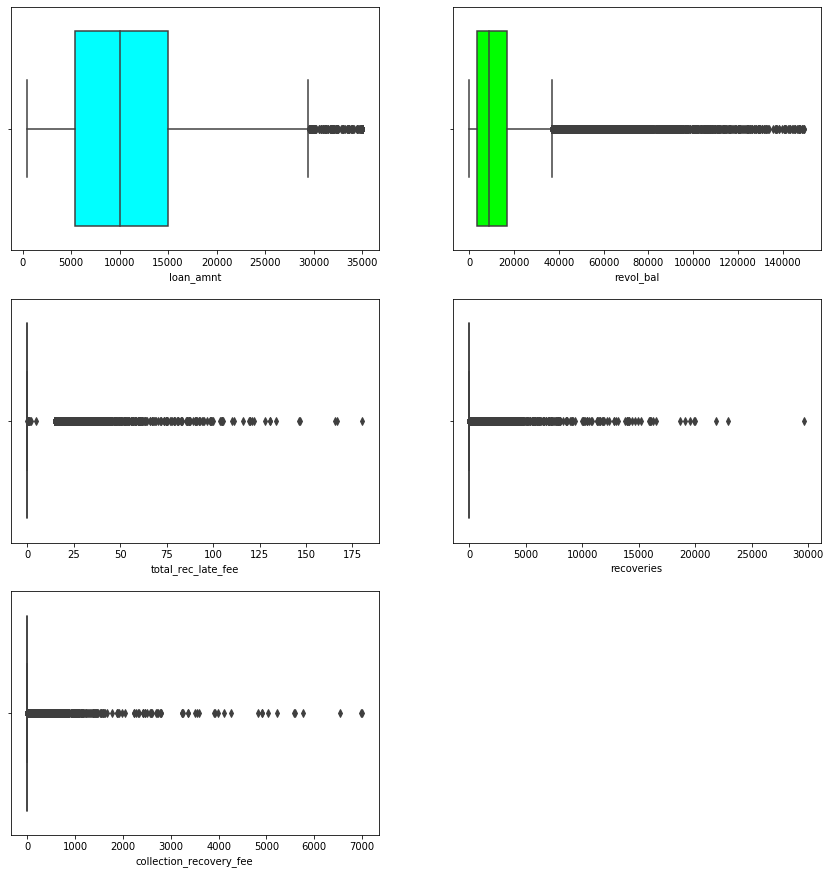

In [65]:
# Checkig outliers in the final data ny plotting boxplot
import seaborn as sns
tr_num = ['loan_amnt','revol_bal','total_rec_late_fee','recoveries','collection_recovery_fee']
c = 1
col = ["aqua","lime","yellow","white","red"]
plt.figure()
for i in tr_num:
    plt.subplot(3,2,c)
    sns.boxplot(Final_data[i],boxprops = dict(facecolor = col[c-1]))
    c += 1
plt.subplots_adjust(right = 2,top = 3)
plt.show()

In [66]:
pd.DataFrame(Final_data,columns= ['loan_amnt','revol_bal','total_rec_late_fee',"recoveries","collection_recovery_fee"]).describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))

,loan_amnt,revol_bal,total_rec_late_fee,recoveries,collection_recovery_fee
count,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000
mean,11134.730115,13329.338898,1.376608,97.395175,12.739819
std,7398.238030,15876.810124,7.342927,698.421503,150.608489
min,500.000000,0.000000,0.000000,0.000000,0.000000
1%,1200.000000,0.000000,0.000000,0.000000,0.000000
10%,3200.000000,1106.400000,0.000000,0.000000,0.000000
30%,6000.000000,4591.400000,0.000000,0.000000,0.000000
50%,10000.000000,8803.000000,0.000000,0.000000,0.000000
75%,15000.000000,16981.500000,0.000000,0.000000,0.000000
90%,22000.000000,29031.600000,0.000000,15.400000,0.000000


In [67]:
# Outlier removal by Inter Quartile Range method (For loan_amnt)

loan_amnt_col_df = pd.DataFrame(Final_data['loan_amnt'])
loan_amnt_median = loan_amnt_col_df.median()

Q3 = loan_amnt_col_df.quantile(q=0.75)
Q1 = loan_amnt_col_df.quantile(q=0.25)
IQR = Q3-Q1

IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)

print(IQR_LL,IQR_UL,loan_amnt_median)

Final_data.loc[Final_data['loan_amnt']>IQR_UL , 'loan_amnt'] = loan_amnt_col_df.quantile(q=0.99)
Final_data.loc[Final_data['loan_amnt']<IQR_LL , 'loan_amnt'] = loan_amnt_col_df.quantile(q=0.01)

-9000 29400 loan_amnt    10000.0
dtype: float64


In [68]:
# Outlier removal by Inter Quartile Range method (For revol_bal)

revol_bal_col_df = pd.DataFrame(Final_data['revol_bal'])
revol_bal_median = revol_bal_col_df.median()

Q3 = revol_bal_col_df.quantile(q=0.75)
Q1 = revol_bal_col_df.quantile(q=0.25)
IQR = Q3-Q1

IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)

print(IQR_LL,IQR_UL,revol_bal_median)

Final_data.loc[Final_data['revol_bal']>IQR_UL , 'revol_bal'] = revol_bal_col_df.quantile(q=0.99)
Final_data.loc[Final_data['revol_bal']<IQR_LL , 'revol_bal'] = revol_bal_col_df.quantile(q=0.01)

-16297 36948 revol_bal    8803.0
dtype: float64


In [69]:
# Outlier removal by Inter Quartile Range method (For total_rec_late_fee)

total_rec_late_fee_col_df = pd.DataFrame(Final_data['total_rec_late_fee'])
total_rec_late_fee_median = total_rec_late_fee_col_df.median()

Q3 = total_rec_late_fee_col_df.quantile(q=0.75)
Q1 = total_rec_late_fee_col_df.quantile(q=0.25)
IQR = Q3-Q1

IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)

print(IQR_LL,IQR_UL,total_rec_late_fee_median)

Final_data.loc[Final_data['total_rec_late_fee']>IQR_UL , 'total_rec_late_fee'] = total_rec_late_fee_col_df.quantile(q=0.99)
Final_data.loc[Final_data['total_rec_late_fee']<IQR_LL , 'total_rec_late_fee'] = total_rec_late_fee_col_df.quantile(q=0.01)

0 0 total_rec_late_fee    0.0
dtype: float64


In [70]:
# Outlier removal by Inter Quartile Range method (For recoveries)

recoveries_col_df = pd.DataFrame(Final_data['recoveries'])
recoveries_median = recoveries_col_df.median()

Q3 = recoveries_col_df.quantile(q=0.75)
Q1 = recoveries_col_df.quantile(q=0.25)
IQR = Q3-Q1

IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)

print(IQR_LL,IQR_UL,recoveries_median)

Final_data.loc[Final_data['recoveries']>IQR_UL , 'recoveries'] = recoveries_col_df.quantile(q=0.99)
Final_data.loc[Final_data['recoveries']<IQR_LL , 'recoveries'] = recoveries_col_df.quantile(q=0.01)

0 0 recoveries    0.0
dtype: float64


In [71]:
# Outlier removal by Inter Quartile Range method (For collection_recovery_fee)

collection_recovery_fee_col_df = pd.DataFrame(Final_data['collection_recovery_fee'])
collection_recovery_fee_median = collection_recovery_fee_col_df.median()

Q3 = collection_recovery_fee_col_df.quantile(q=0.75)
Q1 = collection_recovery_fee_col_df.quantile(q=0.25)
IQR = Q3-Q1

IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)

print(IQR_LL,IQR_UL,collection_recovery_fee_median)

Final_data.loc[Final_data['collection_recovery_fee']>IQR_UL , 'collection_recovery_fee'] = collection_recovery_fee_col_df.quantile(q=0.99)
Final_data.loc[Final_data['collection_recovery_fee']<IQR_LL , 'collection_recovery_fee'] = collection_recovery_fee_col_df.quantile(q=0.01)

0 0 collection_recovery_fee    0.0
dtype: float64


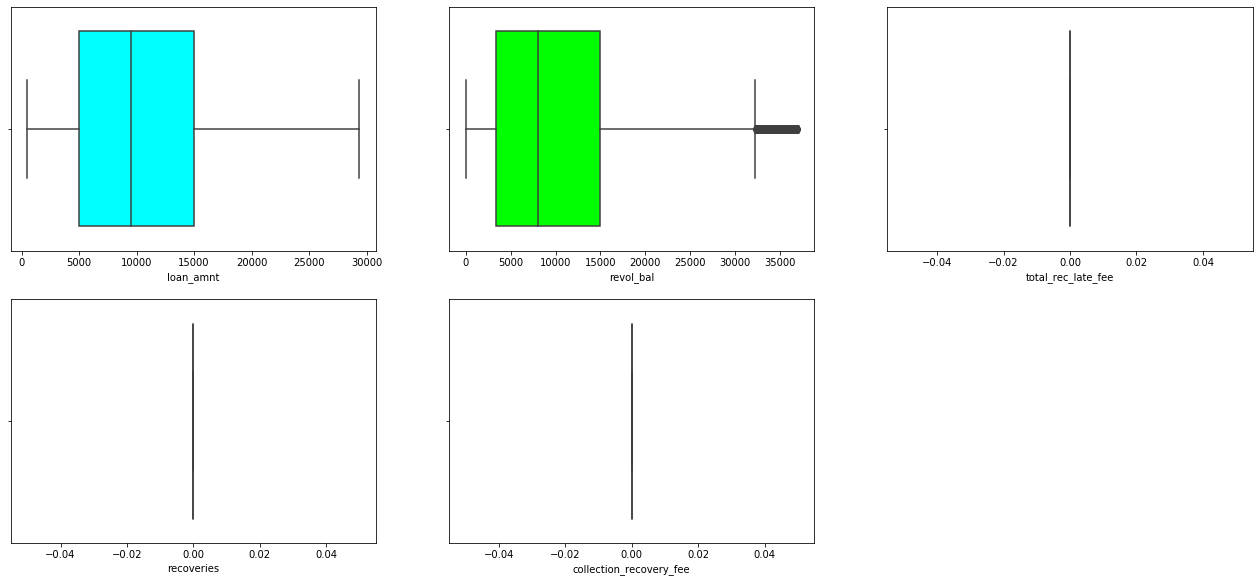

In [72]:
#Boxplots after outier treatment
import seaborn as sns
tr_num = ['loan_amnt','revol_bal','total_rec_late_fee','recoveries','collection_recovery_fee']
c = 1
col = ["aqua","lime","yellow","white","red"]
plt.figure()
for i in tr_num:
    plt.subplot(3,3,c)
    sns.boxplot(Final_data[i],boxprops = dict(facecolor = col[c-1]))
    c += 1
plt.subplots_adjust(right = 3,top = 3)
plt.show()

In [73]:
Final_data.describe(include="all")

,loan_amnt,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies,fico_average,term_ 60 months,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
count,38088.000000,39239.000000,38182.0,3.923900e+04,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,36784.000000,39189.000000,37203.0,34984.0,35420.0,38542.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000,39239.000000
unique,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,8717.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10471.772606,2.567853,NaN,6.888432e+04,0.855934,13.293984,0.146563,0.870359,9.286501,10183.235129,48.737661,0.0,0.0,0.0,0.043459,717.000765,0.258493,0.000076,0.002498,0.077168,0.476923,0.251484,0.319223,0.129361,0.468157,0.008283,0.075155,0.009480,0.055659,0.017585,0.014832,0.100334,0.002625,0.045771,0.009633,0.023981
std,6421.992353,1.384630,NaN,6.400031e+04,0.351161,6.676607,0.491534,1.070904,4.402060,8505.347697,28.350922,0.0,0.0,0.0,0.204526,35.868102,0.437812,0.008744,0.049913,0.266861,0.499474,0.433872,0.466182,0.335603,0.498991,0.090632,0.263644,0.096906,0.229265,0.131437,0.120882,0.300448,0.051168,0.208990,0.097677,0.152993
min,500.000000,1.000000,NaN,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,627.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5000.000000,1.000000,NaN,4.001400e+04,1.000000,8.160000,0.000000,0.000000,6.000000,3381.000000,25.300000,0.0,0.0,0.0,0.000000,687.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9500.000000,2.000000,NaN,5.900000e+04,1.000000,13.390000,0.000000,1.000000,9.000000,8077.000000,49.100000,0.0,0.0,0.0,0.000000,712.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15000.000000,3.000000,NaN,8.200000e+04,1.000000,18.570000,0.000000,1.000000,12.000000,14917.250000,72.300000,0.0,0.0,0.0,0.000000,742.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [74]:
Final_data.head()

,loan_amnt,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies,fico_average,term_ 60 months,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,2,10,24000.0,1,27.65,0.0,1.0,3.0,13648.0,83.7,0.0,0.0,0.0,0.0,737.0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,3,0,30000.0,0,1.00,0.0,5.0,3.0,1687.0,9.4,0.0,NaN,NaN,0.0,742.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,3,10,12252.0,1,8.72,0.0,2.0,2.0,2956.0,98.5,0.0,0.0,0.0,0.0,737.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,3,10,49200.0,1,20.00,0.0,1.0,10.0,5598.0,21.0,NaN,0.0,0.0,0.0,692.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5000.0,1,3,36000.0,1,11.20,0.0,3.0,9.0,7963.0,28.3,0.0,0.0,0.0,0.0,732.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [75]:
Final_data.shape

(39239, 36)

In [76]:
Final_data.isnull().sum()

loan_amnt                              1151
grade                                     0
emp_length                             1057
annual_inc                                0
loan_status                               0
dti                                       0
delinq_2yrs                               0
inq_last_6mths                            0
open_acc                                  0
revol_bal                              2455
revol_util                               50
total_rec_late_fee                     2036
recoveries                             4255
collection_recovery_fee                3819
pub_rec_bankruptcies                    697
fico_average                              0
term_ 60 months                           0
home_ownership_NONE                       0
home_ownership_OTHER                      0
home_ownership_OWN                        0
home_ownership_RENT                       0
verification_status_Source Verified       0
verification_status_Verified    

In [77]:
train_Data = ["revol_bal","total_rec_late_fee","recoveries","collection_recovery_fee","loan_amnt","emp_length","revol_util","pub_rec_bankruptcies"]

for item in train_Data:
    Final_data[item].fillna((Final_data[item].median()), inplace = True)


In [78]:
Final_data.isnull().sum()

loan_amnt                              0
grade                                  0
emp_length                             0
annual_inc                             0
loan_status                            0
dti                                    0
delinq_2yrs                            0
inq_last_6mths                         0
open_acc                               0
revol_bal                              0
revol_util                             0
total_rec_late_fee                     0
recoveries                             0
collection_recovery_fee                0
pub_rec_bankruptcies                   0
fico_average                           0
term_ 60 months                        0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Source Verified    0
verification_status_Verified           0
purpose_credit_card                    0
purpose_debt_con

In [79]:
Final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39239 entries, 0 to 39238
Data columns (total 36 columns):
loan_amnt                              39239 non-null float64
grade                                  39239 non-null int64
emp_length                             39239 non-null float64
annual_inc                             39239 non-null float64
loan_status                            39239 non-null int64
dti                                    39239 non-null float64
delinq_2yrs                            39239 non-null float64
inq_last_6mths                         39239 non-null float64
open_acc                               39239 non-null float64
revol_bal                              39239 non-null float64
revol_util                             39239 non-null float64
total_rec_late_fee                     39239 non-null float64
recoveries                             39239 non-null float64
collection_recovery_fee                39239 non-null float64
pub_rec_bankruptcies       

In [80]:
Final_data.shape

(39239, 36)

In [81]:
Final_data["loan_status"].value_counts()

1    33586
0     5653
Name: loan_status, dtype: int64

# Model Creation

In [82]:
# separating respnse and predictors variable
x = Final_data.loc[:,Final_data.columns != 'loan_status']
x.head()

,loan_amnt,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies,fico_average,term_ 60 months,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,2,10.0,24000.0,27.65,0.0,1.0,3.0,13648.0,83.7,0.0,0.0,0.0,0.0,737.0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,3,0.0,30000.0,1.00,0.0,5.0,3.0,1687.0,9.4,0.0,0.0,0.0,0.0,742.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,3,10.0,12252.0,8.72,0.0,2.0,2.0,2956.0,98.5,0.0,0.0,0.0,0.0,737.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,3,10.0,49200.0,20.00,0.0,1.0,10.0,5598.0,21.0,0.0,0.0,0.0,0.0,692.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5000.0,1,3.0,36000.0,11.20,0.0,3.0,9.0,7963.0,28.3,0.0,0.0,0.0,0.0,732.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [83]:
x.shape

(39239, 35)

In [84]:
y = Final_data.loan_status

In [85]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [86]:
y.shape

(39239,)

# Split the data into train and test and Make a balanced data 

In [87]:
#Trying to balace the data as the data is imbalanced
from sklearn.utils import resample

y = Final_data.loan_status
X = Final_data.drop('loan_status', axis=1)

In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3, random_state =0)

In [89]:
x = pd.concat([x_train, y_train], axis=1)

In [90]:
#separate minority and majority classes
loan_paid_off = x[x.loan_status==1]
defaulted = x[x.loan_status==0]

#upsample minority*
defaulted_upsampled = resample(defaulted,
                          replace=True, # sample with replacement
                          n_samples=len(loan_paid_off), # match number in majority class
                          random_state=27)
# combine majority and upsampled minority
upsampled = pd.concat([loan_paid_off, defaulted_upsampled])

upsampled.loan_status.value_counts()

1    23558
0    23558
Name: loan_status, dtype: int64

In [91]:
y_train = upsampled.loan_status
x_train = upsampled.drop('loan_status', axis=1)

# Train the model

In [92]:
# fitting lR model
logreg = LogisticRegression()
logreg.fit(x_train,y_train)


C:\Users\Bishal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
x_train.shape

(47116, 35)

In [94]:
x_test.shape

(11772, 35)

# Predict the test results

In [95]:
y_pred = logreg.predict(x_test)

# Check accuracy of the model

In [96]:
from sklearn import metrics
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))

Accuracy of logistic regression classifier on test set: 0.64


In [97]:
print('Accuracy of logistic regression classifier on test set: %d', (logreg.score(x_test,y_test)))

Accuracy of logistic regression classifier on test set: %d 0.6380394155623513


# Evaluate the model using confusion matrix

In [98]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1076  668]
 [3593 6435]]


In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.23      0.62      0.34      1744
           1       0.91      0.64      0.75     10028

    accuracy                           0.64     11772
   macro avg       0.57      0.63      0.54     11772
weighted avg       0.81      0.64      0.69     11772



In [100]:
logreg.predict_proba(x_test)

array([[0.51130816, 0.48869184],
       [0.62054243, 0.37945757],
       [0.51828589, 0.48171411],
       ...,
       [0.32312629, 0.67687371],
       [0.30337503, 0.69662497],
       [0.46649423, 0.53350577]])

In [101]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [102]:
logit_roc_auc = roc_auc_score(y_test, y_pred) #This is to calculate AUC(Area under curve)

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])

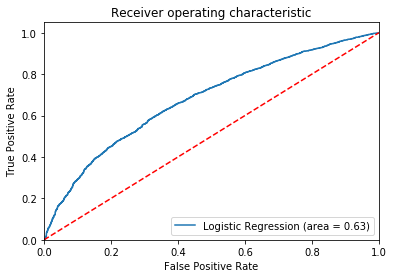

In [103]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


# Using Decision Tree 

In [104]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [105]:
DT = tree.DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=0)
DT.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [106]:
y_train_pred = DT.predict(x_train)
y_test_pred = DT.predict(x_test)

In [107]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.64


In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1076  668]
 [3593 6435]]


# Using Random Forest 

In [109]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [110]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [111]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.64


In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1076  668]
 [3593 6435]]
